In [12]:
from __future__ import print_function
import numpy as np
np.random.seed(15555)
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split


%matplotlib inline

data = datasets.load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# X_scaler = StandardScaler()
# y_scaler = StandardScaler()

# X_train = X_scaler.fit_transform(X_train)
# y_train = y_scaler.fit_transform(y_train)

# X_test = X_scaler.transform(X_test)
# y_test = y_scaler.transform(y_test)

# model = LinearRegression()
# model.fit(X_train, y_train)

# plt.plot(y_test,'g')
# plt.plot(model.predict(X_test),'r')

# regressor = SGDRegressor(loss='squared_loss')
# scores = cross_val_score(regressor, X_train, y_train, cv=5)

# print('『交叉驗證R方值:』', scores)
# regressor.fit_transform(X_train, y_train)


# print('『測試集R方值:』', regressor.score(X_test, y_test))


,0
0,33.4
1,32.0
2,19.6
3,31.6
4,13.5
5,13.4
6,21.9
7,43.5
8,35.4
9,24.7


256536
85512
-6.1366610527 seconds


/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

『交叉驗證R方值:』 [ 0.1570903  -0.35875387  0.18841284 -0.1198874  -0.06510667]


/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


『測試集R方值:』 0.355757395149


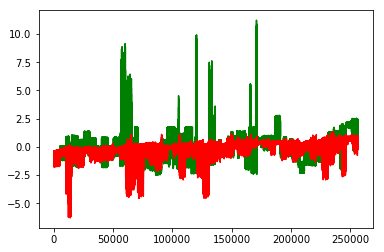

In [107]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(13777)
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# from sklearn.cross_validation import train_test_split
%matplotlib inline

oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;

# olier=olier.drop(['fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

#StandardScaler 標準化
# olier=StandardScaler().fit_transform(olier)
# olierc=pd.DataFrame(olier,columns=['sortby','direct','lane','YY','day','date','time','speed','accu','eqflow'])

olierc=olier.drop(['fakeornot','realvd'],axis=1);olier
olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-3]+olierclo[-2:]+olierclo[-3:-2]]

olierc


#0225version
def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in sortbylist:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print (len(cluster01tra))
cluster01tes=np.array(teslist)
print (len(cluster01tes))
print((start - time.time()),'seconds')

# cluster01tra = preprocessing.scale(cluster01tra)
# cluster01tes = preprocessing.scale(cluster01tes)
cluster01tra=StandardScaler().fit_transform(cluster01tra)
cluster01tes=StandardScaler().fit_transform(cluster01tes)


traind=pd.DataFrame(cluster01tra,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])
testd =pd.DataFrame(cluster01tes,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])

traind_x=traind[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
traind_y=traind[['speed']].copy().values
testd_x=testd[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
testd_y=testd[['speed']].copy().values



model = LinearRegression()
model.fit(traind_x, traind_y)

plt.plot(traind_y,'g')
plt.plot(model.predict(traind_x),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, traind_x, traind_y, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(traind_x, traind_y)


print('『測試集R方值:』', regressor.score(testd_x, testd_y))


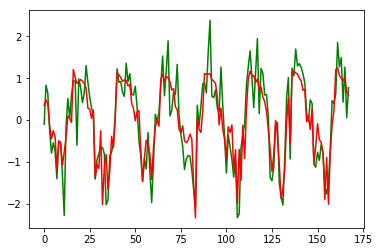

In [77]:
plt.plot(traind_y[2000:2168],'g')
plt.plot(model.predict(traind_x)[2000:2168],'r')

In [110]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(13777)
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


# from sklearn.cross_validation import train_test_split
%matplotlib inline



oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;

# olier=olier.drop(['fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

#StandardScaler 標準化
# olier=StandardScaler().fit_transform(olier)
# olierc=pd.DataFrame(olier,columns=['sortby','direct','lane','YY','day','date','time','speed','accu','eqflow'])

olierc=olier.drop(['fakeornot','realvd'],axis=1);olier
olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-3]+olierclo[-2:]+olierclo[-3:-2]]

olierc


#0225version
def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in sortbylist:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print (len(cluster01tra))
cluster01tes=np.array(teslist)
print (len(cluster01tes))
print((start - time.time()),'seconds')

# cluster01tra = preprocessing.scale(cluster01tra)
# cluster01tes = preprocessing.scale(cluster01tes)

cluster01tra=StandardScaler().fit_transform(cluster01tra)
cluster01tes=StandardScaler().fit_transform(cluster01tes)


traind=pd.DataFrame(cluster01tra,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])
testd =pd.DataFrame(cluster01tes,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])

traind_x=traind[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
traind_y=traind[['speed']].copy().values
testd_x=testd[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
testd_y=testd[['speed']].copy().values




quadratic_featurizer = PolynomialFeatures(degree=7)

X_train_quadratic = quadratic_featurizer.fit_transform(traind_x)
X_test_quadratic = quadratic_featurizer.transform(testd_x)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, traind_y)


plt.plot(testd_y,'g')
plt.plot(regressor_quadratic.predict(X_test_quadratic),'r')



# model = LinearRegression()
# model.fit(traind_x, traind_y)

# plt.plot(traind_y,'g')
# plt.plot(model.predict(traind_x),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train_quadratic, traind_y, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(X_train_quadratic, traind_y)


print('『測試集R方值:』', regressor.score(X_test_quadratic, testd_y))


256536
85512
-6.15743589401 seconds


KeyboardInterrupt: 

5040
1680
-0.192783117294 seconds
『交叉驗證R方值:』 [ 0.64209859  0.71590149  0.6679326   0.6598512   0.55903091]
『測試集R方值:』 0.584032740308


/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

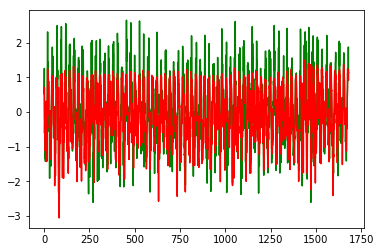

In [83]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(13777)
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# from sklearn.cross_validation import train_test_split
%matplotlib inline



oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;

# olier=olier.drop(['fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

#StandardScaler 標準化
# olier=StandardScaler().fit_transform(olier)
# olierc=pd.DataFrame(olier,columns=['sortby','direct','lane','YY','day','date','time','speed','accu','eqflow'])

olierc=olier.drop(['fakeornot','realvd'],axis=1);olier
olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-3]+olierclo[-2:]+olierclo[-3:-2]]

olierc


#0225version
def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in [sortbylist[0]]:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print (len(cluster01tra))
cluster01tes=np.array(teslist)
print (len(cluster01tes))
print((start - time.time()),'seconds')

cluster01tra=StandardScaler().fit_transform(cluster01tra)
cluster01tes=StandardScaler().fit_transform(cluster01tes)


traind=pd.DataFrame(cluster01tra,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])
testd =pd.DataFrame(cluster01tes,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])

traind_x=traind[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
traind_y=traind[['speed']].copy().values
testd_x=testd[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
testd_y=testd[['speed']].copy().values


clf = linear_model.BayesianRidge()

clf.fit(traind_x, traind_y)


plt.plot(testd_y,'g')
plt.plot(clf.predict(testd_x),'r')



# model = LinearRegression()
# model.fit(traind_x, traind_y)

# plt.plot(traind_y,'g')
# plt.plot(model.predict(traind_x),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, traind_x, traind_y, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(traind_x, traind_y)


print('『測試集R方值:』', regressor.score(testd_x, testd_y))


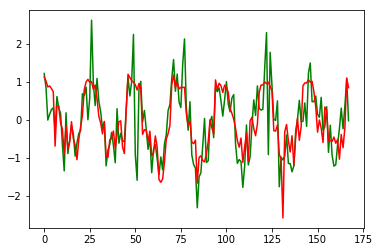

In [84]:
plt.plot(testd_y[500:668],'g')
plt.plot(clf.predict(testd_x)[500:668],'r')

5040
1680
-0.168174028397 seconds
『交叉驗證R方值:』 [ 0.64363264  0.71472432  0.66873108  0.66107322  0.55684084]
『測試集R方值:』 0.583433604497


/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

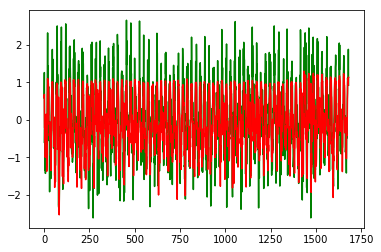

In [105]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(13777)
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import svm

# from sklearn.cross_validation import train_test_split
%matplotlib inline



oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;

# olier=olier.drop(['fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

#StandardScaler 標準化
# olier=StandardScaler().fit_transform(olier)
# olierc=pd.DataFrame(olier,columns=['sortby','direct','lane','YY','day','date','time','speed','accu','eqflow'])

olierc=olier.drop(['fakeornot','realvd'],axis=1);olier
olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-3]+olierclo[-2:]+olierclo[-3:-2]]

olierc


#0225version
def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in [sortbylist[0]]:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print (len(cluster01tra))
cluster01tes=np.array(teslist)
print (len(cluster01tes))
print((start - time.time()),'seconds')

cluster01tra=StandardScaler().fit_transform(cluster01tra)
cluster01tes=StandardScaler().fit_transform(cluster01tes)


traind=pd.DataFrame(cluster01tra,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])
testd =pd.DataFrame(cluster01tes,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])

traind_x=traind[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
traind_y=traind[['speed']].copy().values
testd_x=testd[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
testd_y=testd[['speed']].copy().values



clf = linear_model.SGDRegressor()

clf.fit(traind_x, traind_y)


plt.plot(testd_y,'g')
plt.plot(clf.predict(testd_x),'r')



# model = LinearRegression()
# model.fit(traind_x, traind_y)

# plt.plot(traind_y,'g')
# plt.plot(model.predict(traind_x),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, traind_x, traind_y, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(traind_x, traind_y)


print('『測試集R方值:』', regressor.score(testd_x, testd_y))


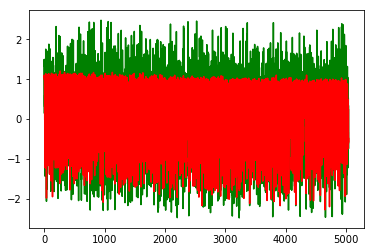

In [106]:
plt.plot(traind_y,'g')
plt.plot(clf.predict(traind_x),'r')
# plt.plot(testd_y[1500:1668],'g')
# plt.plot(clf.predict(testd_x)[1500:1668],'r')

In [171]:
840*49-1680*25

-840

In [184]:
x=840*17
y=168

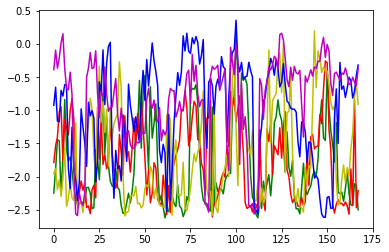

In [185]:
plt.plot(traind_y[x-840:x-4*y],'g-')
plt.plot(traind_y[x-4*y:x-3*y],'r-')
plt.plot(traind_y[x-3*y:x-2*y],'y-')
plt.plot(traind_y[x-2*y:x-y],'b-')
plt.plot(traind_y[x-y:x],'m-')

256536
85512
-6.05472302437 seconds
『交叉驗證R方值:』 [ 0.27401448 -0.38787862  0.18017286 -0.08775087 -0.05225907]


/Users/Jackie/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


『測試集R方值:』 0.351542867627


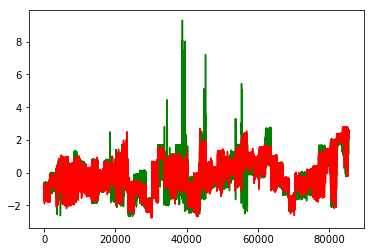

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(13777)
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import svm

from sklearn import neural_network

# from sklearn.cross_validation import train_test_split
%matplotlib inline



oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;

# olier=olier.drop(['fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

#StandardScaler 標準化
# olier=StandardScaler().fit_transform(olier)
# olierc=pd.DataFrame(olier,columns=['sortby','direct','lane','YY','day','date','time','speed','accu','eqflow'])

olierc=olier.drop(['fakeornot','realvd'],axis=1);olier
olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-3]+olierclo[-2:]+olierclo[-3:-2]]

olierc


#0225version
def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in sortbylist:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print (len(cluster01tra))
cluster01tes=np.array(teslist)
print (len(cluster01tes))
print((start - time.time()),'seconds')

cluster01tra=StandardScaler().fit_transform(cluster01tra)
cluster01tes=StandardScaler().fit_transform(cluster01tes)


traind=pd.DataFrame(cluster01tra,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])
testd =pd.DataFrame(cluster01tes,columns=['sortby','direct','lane','YY','day','date','time','accu','eqflow','speed'])

traind_x=traind[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
traind_y=traind[['speed']].copy().values
testd_x=testd[['sortby','direct','lane','YY','day','date','time','accu','eqflow']].copy().values
testd_y=testd[['speed']].copy().values



clf = neural_network.MLPRegressor()

clf.fit(traind_x, traind_y)


plt.plot(testd_y,'g')
plt.plot(clf.predict(testd_x),'r')



# model = LinearRegression()
# model.fit(traind_x, traind_y)

# plt.plot(traind_y,'g')
# plt.plot(model.predict(traind_x),'r')

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, traind_x, traind_y, cv=5)

print('『交叉驗證R方值:』', scores)
regressor.fit_transform(traind_x, traind_y)


print('『測試集R方值:』', regressor.score(testd_x, testd_y))


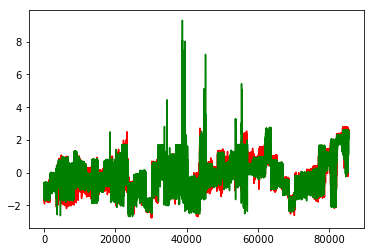

In [3]:
# plt.plot(testd_y,'g')
plt.plot(clf.predict(testd_x),'r')
plt.plot(testd_y,'g')